# Credit cards - Fraud Detection

## Importing the required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import openml


from sklearn.model_selection import train_test_split




## Loading the dataset

In [5]:
credit_fraud_data=openml.datasets.get_dataset(1597)

print(f"This is dataset '{credit_fraud_data.name}", "the target feature is ",
    f"'{credit_fraud_data.default_target_attribute}'")

X, y, categorical_indicator, attribute_names = credit_fraud_data.get_data(target=credit_fraud_data.default_target_attribute, dataset_format="dataframe")
X.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

print(X.info())
print(credit_fraud_data.description)

This is dataset 'creditcard the target feature is  'Class'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  fl

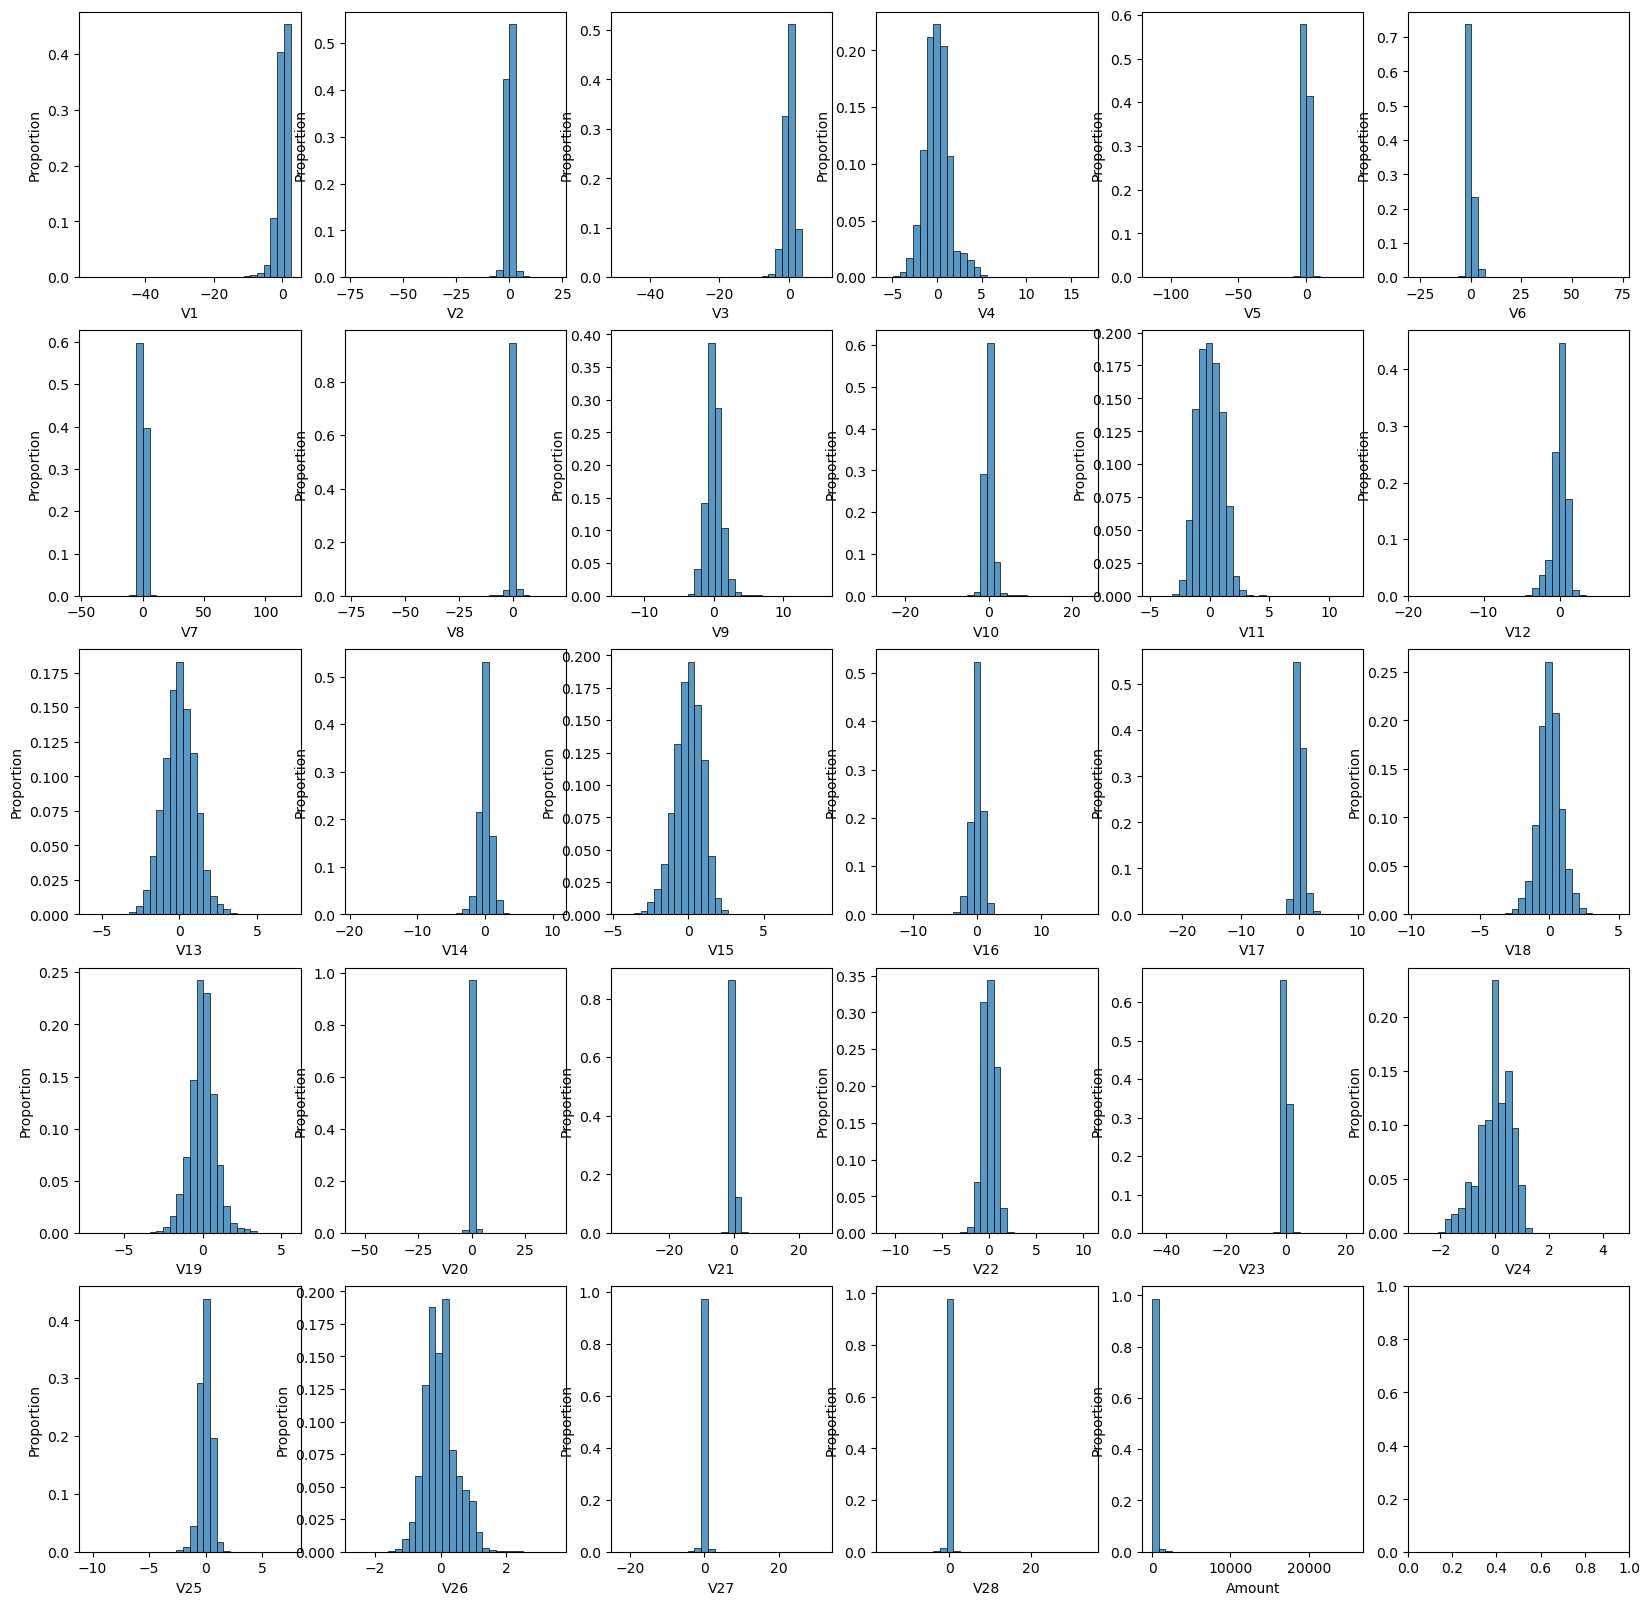

In [6]:
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(20, 20))
for i in range(5):
    for j in range(6):
        if 6*i+j<29:
                sn.histplot(X[X.columns[6 * i + j]],stat='proportion',bins=30, ax=axs[i,j])
plt.show()



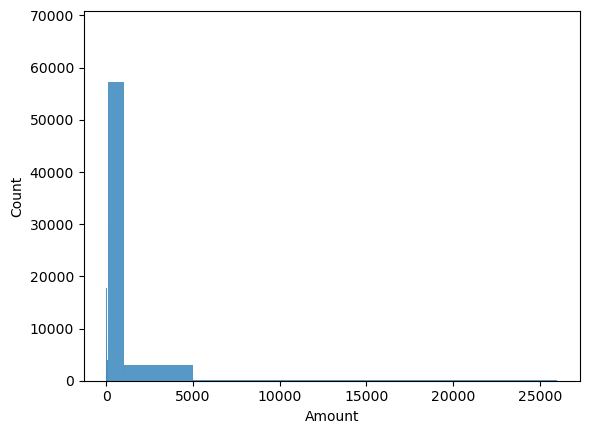

284807

In [50]:
sn.histplot(data=X[X.columns[28]], bins=np.array(list(range(0,100,5))+[1000,5000,26000]))
plt.show()

y.count()

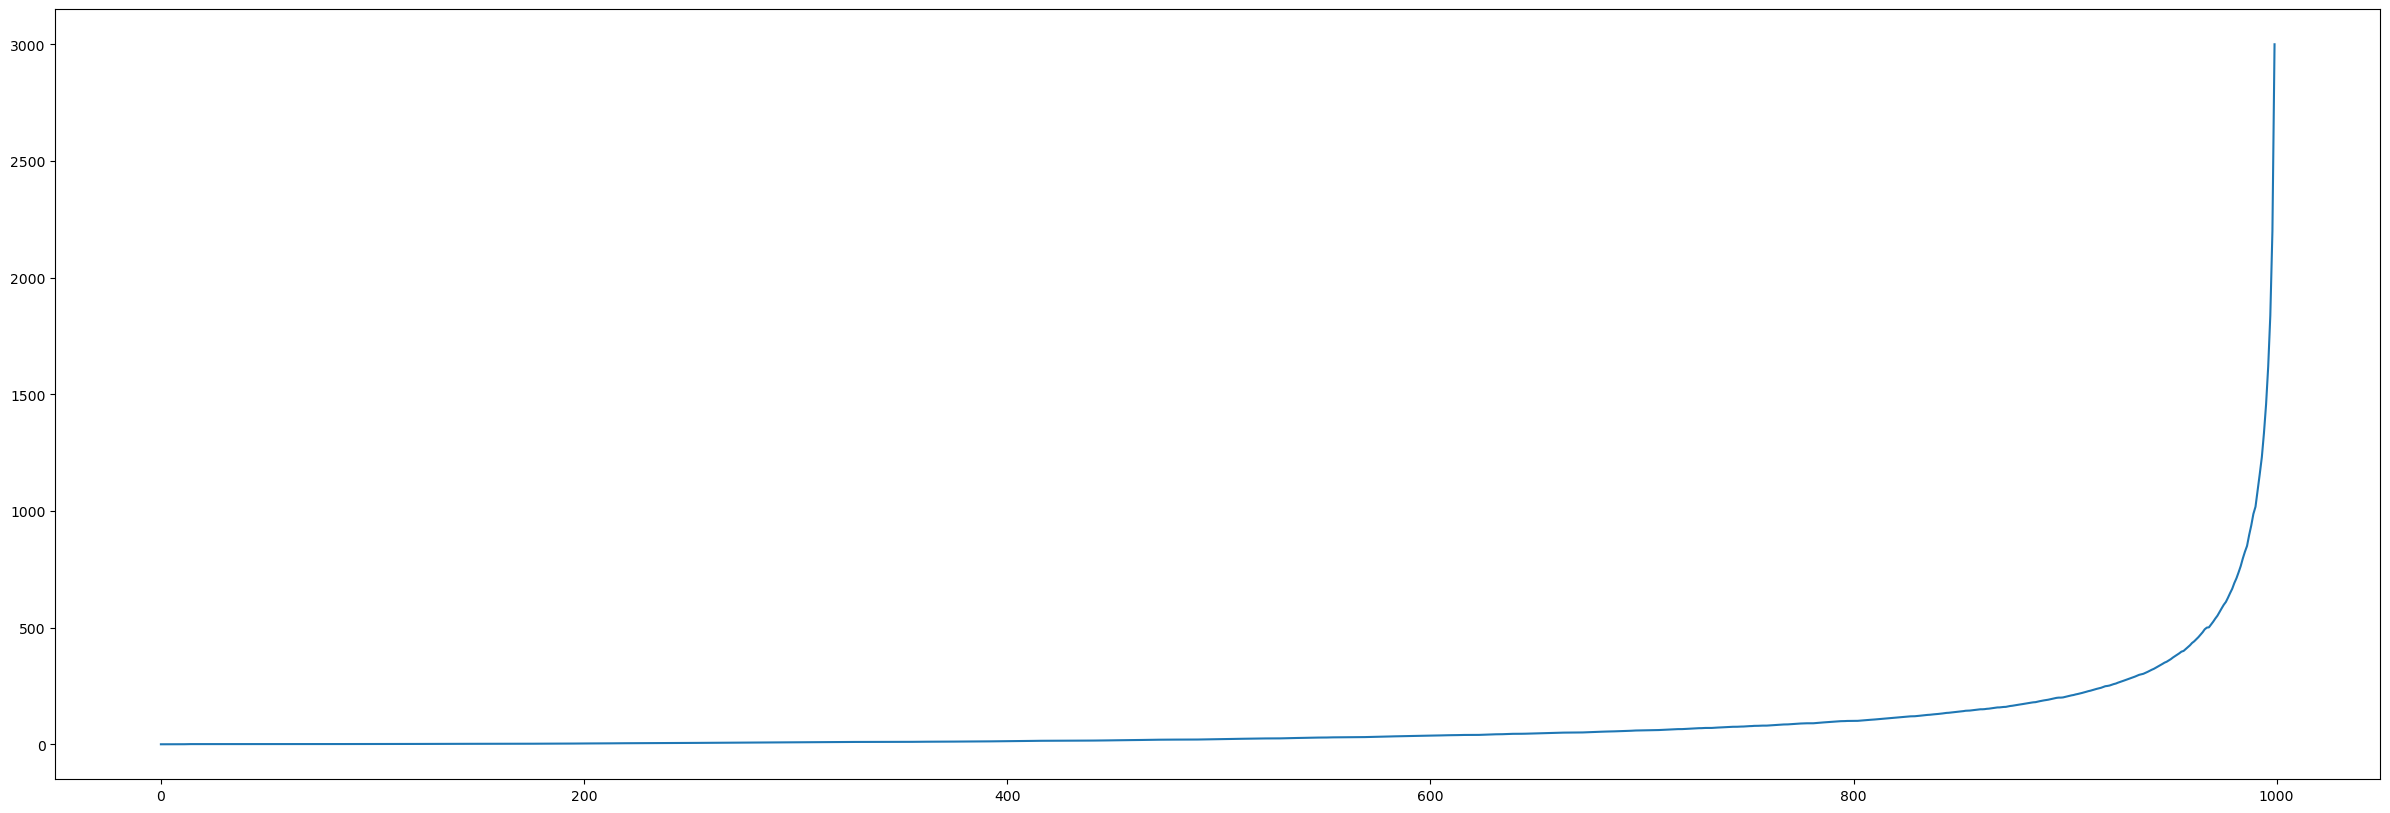

1017.9700000000012

In [44]:
Amount_cum_sum=[]

for k in range(0,1000):
    percentile=X['Amount'].quantile(k/1000)
    Amount_cum_sum.append(percentile)

f , ax=plt.subplots(figsize=(30,10))
plt.plot(Amount_cum_sum)
plt.show()

X['Amount'].quantile(0.99)

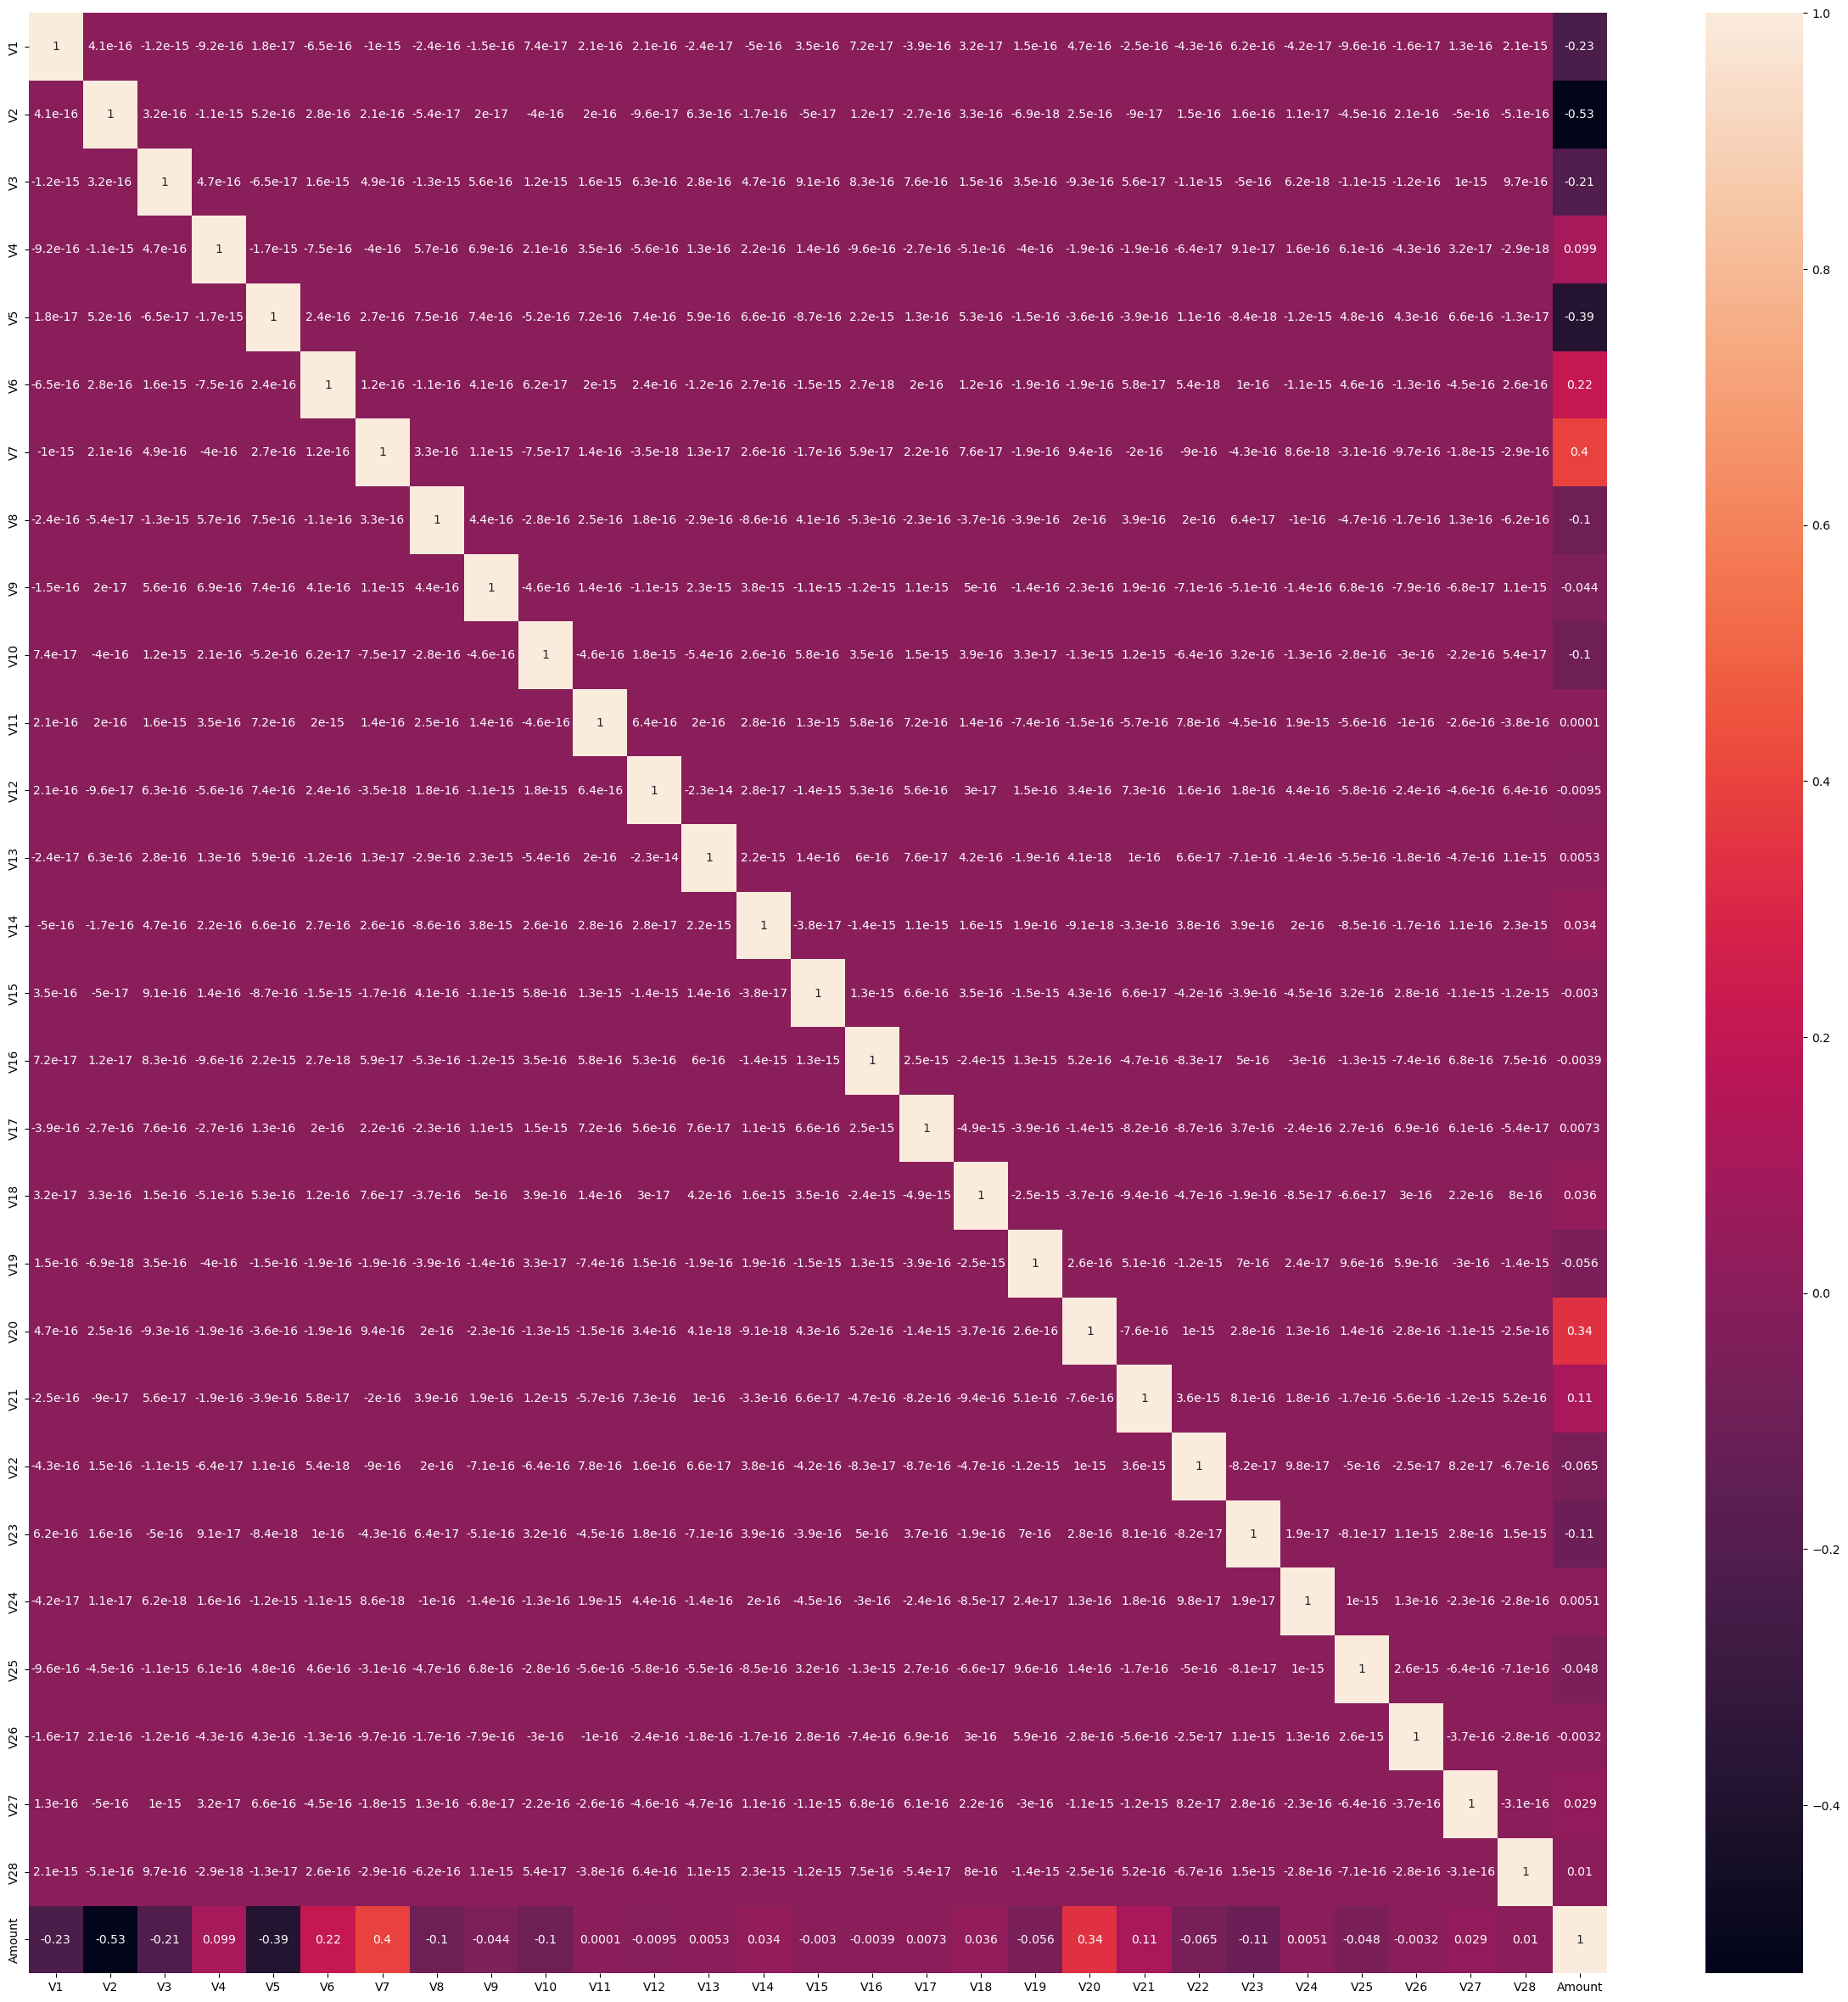

In [13]:
f , ax=plt.subplots(figsize=(30,30))
sn.heatmap(X.corr(), annot=True)
plt.show()

## Linear discriminant

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver='lsqr',store_covariance=True)

lda.fit(X_train, y_train)

lda_pred=lda.predict(X_test)

print(lda_pred)

['0' '0' '0' ... '0' '0' '0']


## Bernoulli naive Bayes

In [8]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X_train, y_train)

bnb_pred =bnb.predict(X_test)

print(bnb_pred)

['0' '0' '0' ... '0' '0' '0']


## Linear support vector machine

In [9]:
from sklearn.svm import LinearSVC

svc=LinearSVC()
svc.fit(X_train,y_train)
svc_pred=svc.predict(X_test)

print(svc_pred)

['0' '0' '0' ... '0' '0' '0']


/Users/mohamedeita/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(max_depth=3)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

print(rf_pred)

['0' '0' '0' ... '0' '0' '0']


## Logistic regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='newton-cg')
lr.fit(X_train,y_train)
lr_pred_proba=lr.predict_proba(X_test)
lr_pred=lr.predict(X_test)

lr_pred_thresh=np.column_stack((lr_pred,lr_pred_proba[:,1]))


In [32]:
lr_pred_0=np.array([i for i in lr_pred_thresh if i[0]=='0'])
lr_pred_1=np.array([i for i in lr_pred_thresh if i[0]=='1'])

print(min(lr_pred_1[:,1]))
print(max(lr_pred_0[:,1]))

0.5824610097466437
0.45658465311310337


## Gaussian process classifier

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc=GaussianProcessClassifier( optimizer=None, multi_class='one_vs_rest', n_jobs = -1)
gpc.fit(X_train,y_train)
gpc_pred=gpc.predict(X_test)

print(gpc_pred)

# Comparing the classifiers

### 1. Confusion matrix

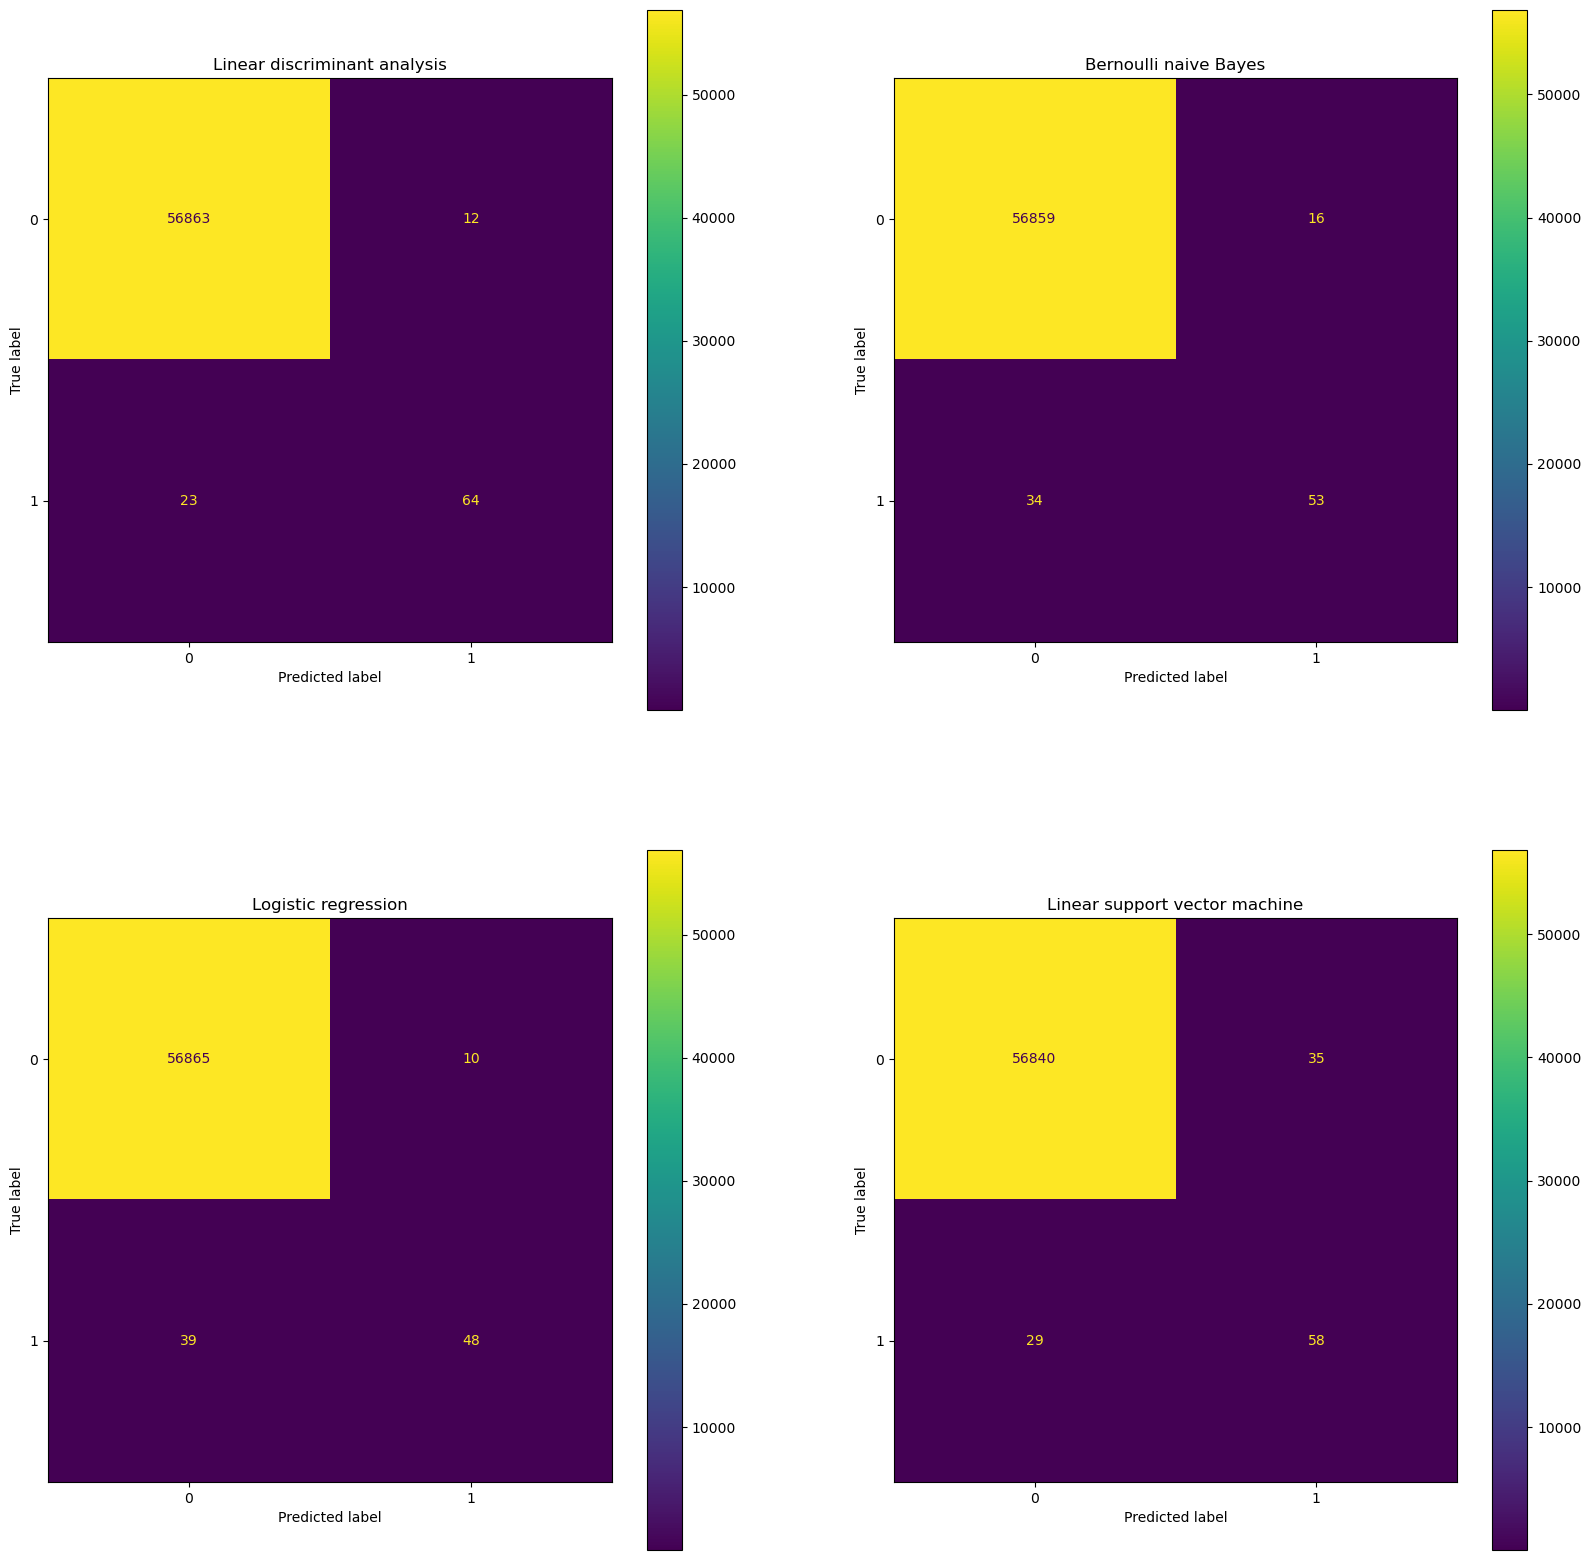

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

predictions=[lda_pred, bnb_pred, lr_pred, svc_pred, rf_pred]
classes=[lda.classes_, bnb.classes_, lr.classes_, svc.classes_, rf.classes_]
names=['Linear discriminant analysis', 'Bernoulli naive Bayes', 'Logistic regression', 'Linear support vector machine', 'Random forest', 'Gaussian processes classifier']



fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
for i in range (2):
    for j in range(2):
        index=2*i+j
        cm=confusion_matrix(y_test, predictions[index], labels=classes[index])
        disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes[index])
        disp.plot(ax=axs[i,j])
        axs[i,j].title.set_text(names[index])
        accuracy=
        precision=
        recall=
        f1_score=
        print()
plt.show()


## K-means clustering

### Feature scaling

In [24]:
scaler=StandardScaler()
X_scaled_array=scaler.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled_array, index=X.index, columns=X.columns)


print(X_scaled.mean())
print(X_scaled.std())
X_scaled.head()

BALANCE                            -2.506872e-18
BALANCE_FREQUENCY                  -5.694740e-15
PURCHASES                           4.031476e-16
ONEOFF_PURCHASES                   -5.819743e-15
INSTALLMENTS_PURCHASES              2.643555e-15
CASH_ADVANCE                       -4.485675e-15
PURCHASES_FREQUENCY                -2.187085e-16
ONEOFF_PURCHASES_FREQUENCY         -8.273836e-15
PURCHASES_INSTALLMENTS_FREQUENCY   -2.427835e-15
CASH_ADVANCE_FREQUENCY              1.809023e-15
CASH_ADVANCE_TRX                   -6.369898e-16
PURCHASES_TRX                      -2.611357e-15
CREDIT_LIMIT                        5.480666e-16
PAYMENTS                            5.660389e-17
MINIMUM_PAYMENTS                    1.707309e-16
PRC_FULL_PAYMENT                   -3.689589e-15
TENURE                             -2.976776e-15
dtype: float64
BALANCE                             1.000058
BALANCE_FREQUENCY                   1.000058
PURCHASES                           1.000058
ONEOFF_PURCHASES 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
4,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
5,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


### K-means algorithm

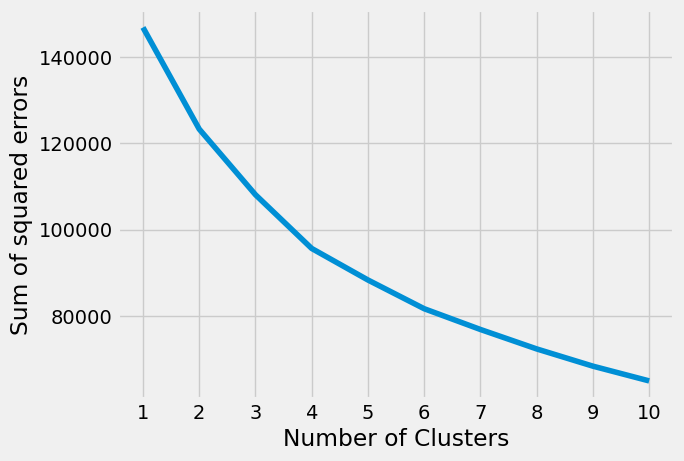

4

In [34]:
inertias=[]

for K in range(1,11):
    kmeans=KMeans(
        init="random",
        n_clusters=K,
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11),inertias)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of squared errors")
plt.show()

kl=KneeLocator(range(1,11), inertias, curve="convex", direction="decreasing")
kl.elbow

### Centroids of the market segments

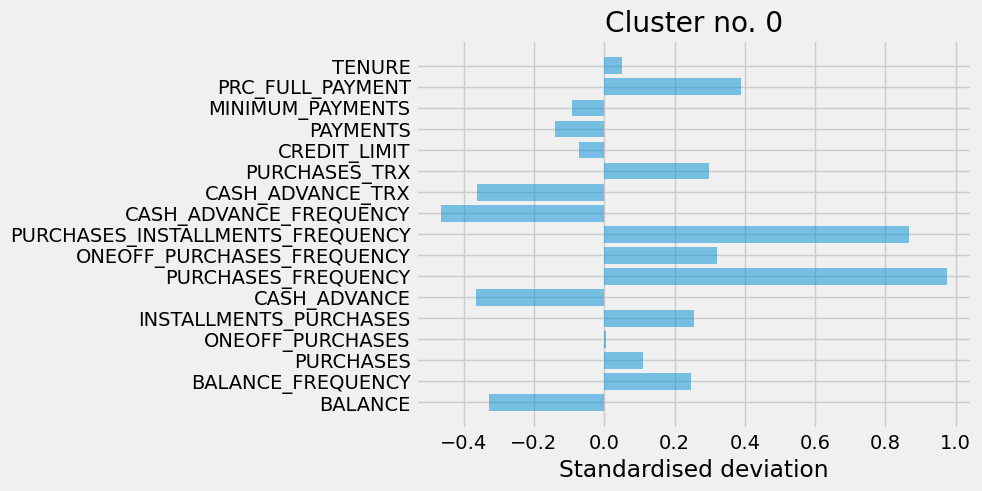

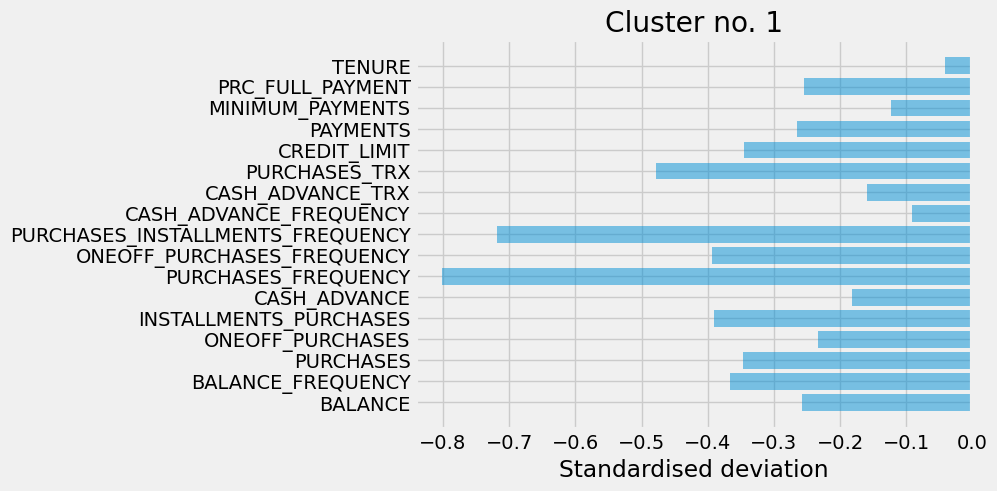

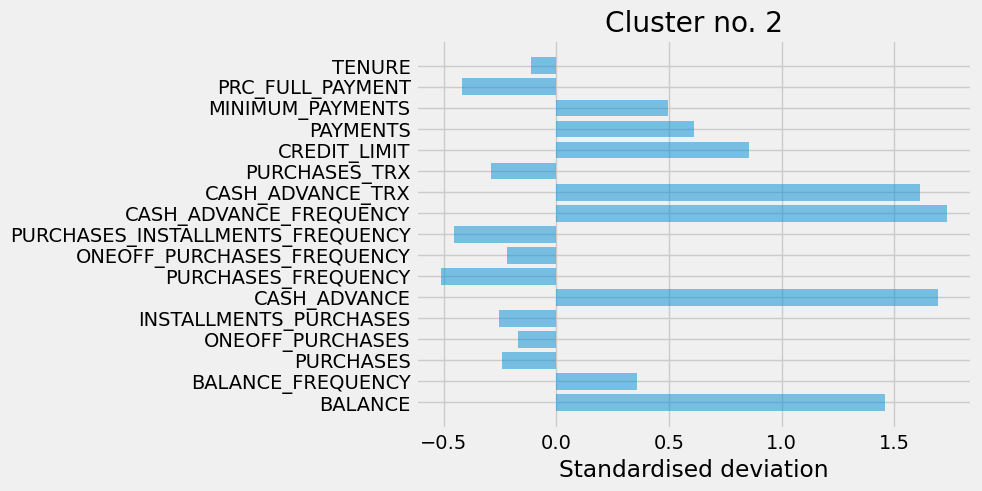

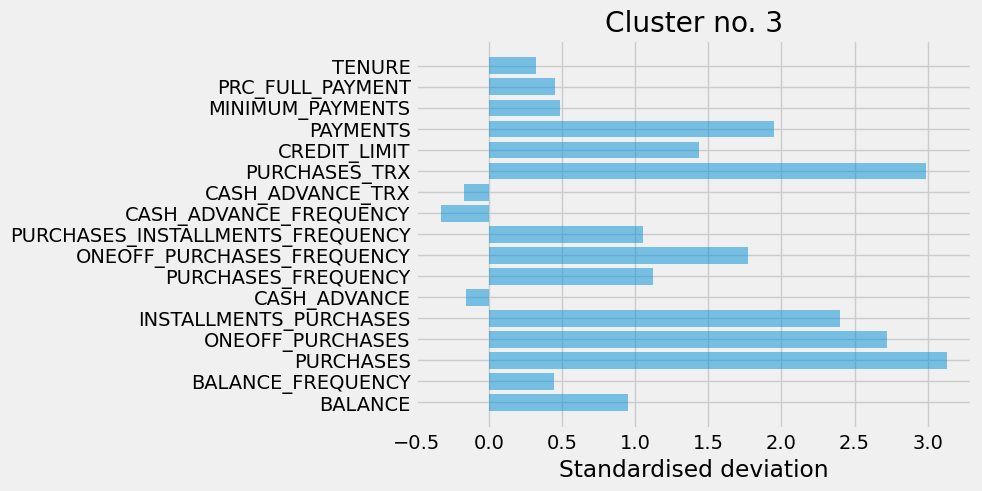

In [51]:
kmeans=KMeans(
        init="random",
        n_clusters=4,
        n_init=10,
        max_iter=300,
        random_state=42
    )
kmeans.fit(X_scaled)




y_pos=np.arange(len(attribute_names))
for cluster in range(4):
    
    plt.barh(y_pos, kmeans.cluster_centers_[cluster,:], align='center', alpha=0.5)
    plt.yticks(y_pos, np.array(attribute_names))
    plt.xlabel('Standardised deviation')
    plt.title(f'Cluster no. {cluster}')

    plt.show()